## Import Libraries & Load Dataset

In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder ,  StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier ,AdaBoostClassifier
from xgboost import XGBRFClassifier
from catboost import CatBoostClassifier
from imblearn.combine import SMOTETomek
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from perceptron import Perceptron
import seaborn as sns
import matplotlib.pyplot as plt

## Titanic Dataset

In [2]:
data = pd.read_csv("Dataset/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

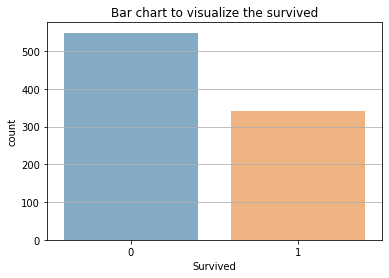

In [3]:
sns.countplot(x="Survived",data=data,alpha=0.6)
plt.title("Bar chart to visualize the survived")
plt.grid(axis = 'y')

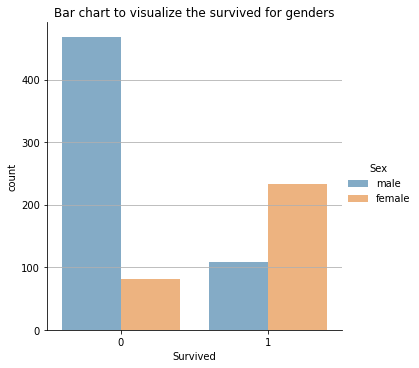

In [4]:
sns.catplot(x="Survived",data=data,kind="count",hue="Sex",alpha=0.6)
plt.title("Bar chart to visualize the survived for genders")
plt.grid(axis = 'y')

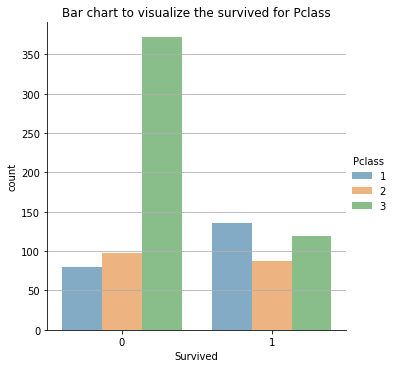

In [5]:
sns.catplot(x="Survived",data=data,kind="count",hue="Pclass",alpha=0.6)
plt.title("Bar chart to visualize the survived for Pclass")
plt.grid(axis = 'y')

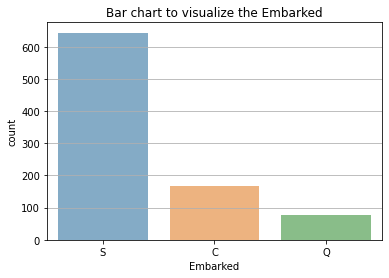

In [6]:
sns.countplot(x="Embarked",data=data,alpha=0.6)
plt.title("Bar chart to visualize the Embarked")
plt.grid(axis = 'y')

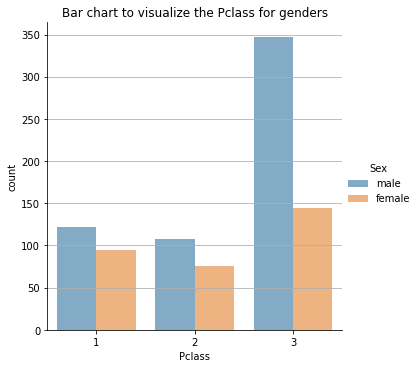

In [7]:
sns.catplot(x="Pclass",data=data,kind="count",hue="Sex",alpha=0.6)
plt.title("Bar chart to visualize the Pclass for genders")
plt.grid(axis = 'y')

Text(0.5, 1.0, 'Histogram chart to visualize the Age')

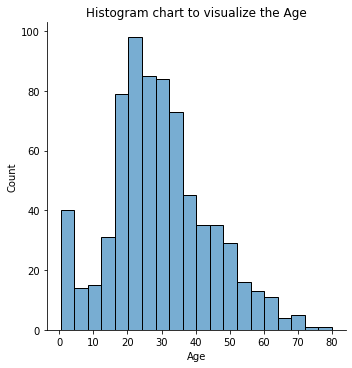

In [8]:
sns.displot(data["Age"],alpha=0.6)
plt.title("Histogram chart to visualize the Age")

<AxesSubplot:>

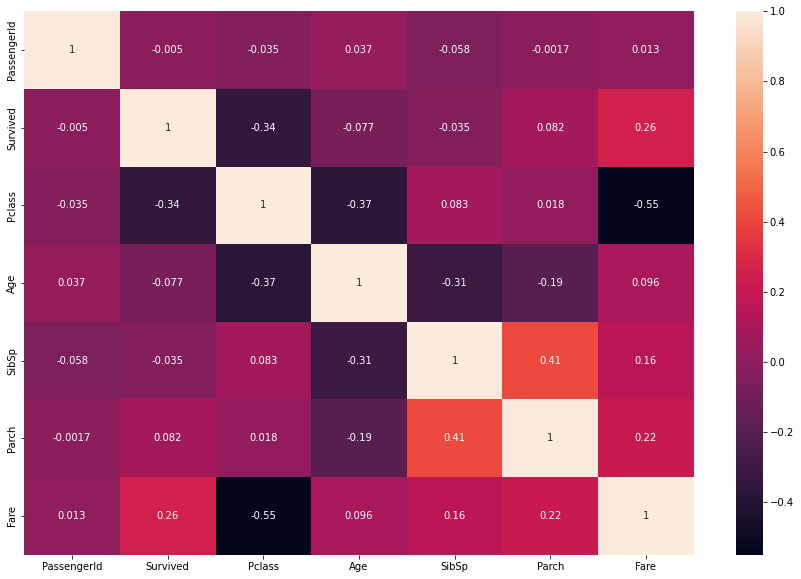

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

# Preprocessing:

In [10]:
data.drop(["Name","Ticket","Cabin"],axis=1,inplace=True)

In [11]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### Convert Categorical to Numerical

### OHE

In [12]:
data = pd.get_dummies(data,columns=["Embarked"])

In [13]:
X = data.drop("Survived",axis=1)
Y = data.Survived.values

In [14]:
X["Sex"] = LabelEncoder().fit_transform(X["Sex"])

### Missing values

In [15]:
X.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [16]:
knn_imp = KNNImputer()
X = knn_imp.fit_transform(X)

### Scaling

In [17]:
SS = StandardScaler()
X = SS.fit_transform(X)

### Balance:
### SMOTETomek

In [18]:
ST = SMOTETomek(random_state=10)
X,Y = ST.fit_resample(X,Y)

In [19]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

# Model

### KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
predict_knn = knn.predict(x_test)

In [21]:
print(metrics.classification_report(y_test,predict_knn))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        89
           1       0.88      0.88      0.88       113

    accuracy                           0.86       202
   macro avg       0.86      0.86      0.86       202
weighted avg       0.86      0.86      0.86       202



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


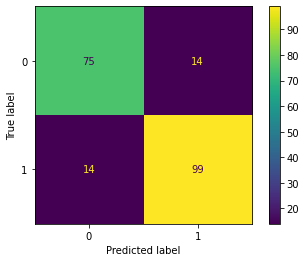

In [22]:
metrics.plot_confusion_matrix(knn,x_test,y_test)

### SVC

In [23]:
svc = SVC(kernel="rbf",C=0.5,random_state=300,verbose=True)
svc.fit(x_train,y_train)
predict_svm = svc.predict(x_test)

[LibSVM]

In [24]:
print(metrics.classification_report(y_test,predict_svm))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        89
           1       0.87      0.80      0.83       113

    accuracy                           0.82       202
   macro avg       0.82      0.83      0.82       202
weighted avg       0.83      0.82      0.82       202



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


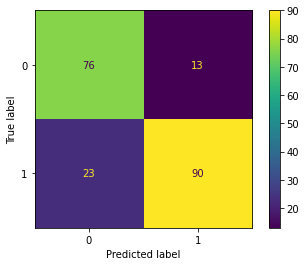

In [25]:
metrics.plot_confusion_matrix(svc,x_test,y_test)

### RandomForestClassifier

In [26]:
RF = RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=242)
RF.fit(x_train,y_train)
predict_rf = RF.predict(x_test)

In [27]:
print(metrics.classification_report(y_test,predict_rf))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        89
           1       0.95      0.92      0.94       113

    accuracy                           0.93       202
   macro avg       0.93      0.93      0.93       202
weighted avg       0.93      0.93      0.93       202



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


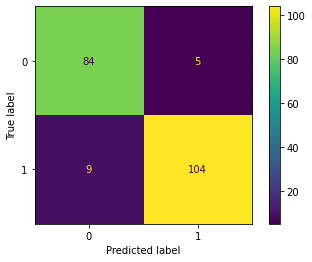

In [28]:
metrics.plot_confusion_matrix(RF,x_test,y_test)

### AdaBoostClassifier

In [29]:
adaboost = AdaBoostClassifier(random_state=242)
adaboost.fit(x_train,y_train)
predict_ab = adaboost.predict(x_test)

In [30]:
print(metrics.classification_report(y_test,predict_ab))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        89
           1       0.86      0.85      0.86       113

    accuracy                           0.84       202
   macro avg       0.84      0.84      0.84       202
weighted avg       0.84      0.84      0.84       202



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


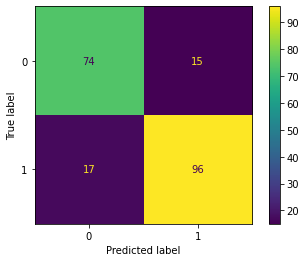

In [31]:
metrics.plot_confusion_matrix(adaboost,x_test,y_test)

### GBoostingClassifier

In [32]:
Gboost = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01,subsample=0.9,min_samples_split=10,max_depth=2,random_state=25)
Gboost.fit(x_train,y_train)
predict_gb = Gboost.predict(x_test)

In [33]:
print(metrics.classification_report(y_test,predict_gb))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        89
           1       0.90      0.86      0.88       113

    accuracy                           0.87       202
   macro avg       0.86      0.87      0.87       202
weighted avg       0.87      0.87      0.87       202



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


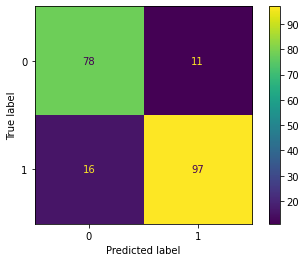

In [34]:
metrics.plot_confusion_matrix(Gboost,x_test,y_test)

### XGBoostClassifier

In [35]:
XGboost = XGBRFClassifier(learning_rate=0.05,subsample=0.5,reg_lambda=0.3)
XGboost.fit(x_train,y_train)
predict_xb = XGboost.predict(x_test)

c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:44:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [36]:
print(metrics.classification_report(y_test,predict_xb))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        89
           1       0.90      0.85      0.87       113

    accuracy                           0.86       202
   macro avg       0.86      0.86      0.86       202
weighted avg       0.86      0.86      0.86       202



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


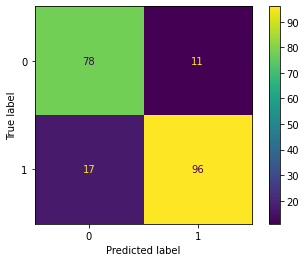

In [37]:
metrics.plot_confusion_matrix(XGboost,x_test,y_test)

### CatBoostClassifier

In [38]:
catboost = CatBoostClassifier(iterations=200,learning_rate=0.55,eval_metric="Accuracy",task_type="GPU",random_state=5)
catboost.fit(x_train,y_train,[],eval_set=(x_test,y_test))

0:	learn: 0.8415842	test: 0.8267327	best: 0.8267327 (0)	total: 13.6ms	remaining: 2.71s
1:	learn: 0.8688119	test: 0.8465347	best: 0.8465347 (1)	total: 26.8ms	remaining: 2.65s
2:	learn: 0.8799505	test: 0.8663366	best: 0.8663366 (2)	total: 37.5ms	remaining: 2.46s
3:	learn: 0.8824257	test: 0.8663366	best: 0.8663366 (2)	total: 48.3ms	remaining: 2.37s
4:	learn: 0.9059406	test: 0.8663366	best: 0.8663366 (2)	total: 59.6ms	remaining: 2.32s
5:	learn: 0.9158416	test: 0.8712871	best: 0.8712871 (5)	total: 70ms	remaining: 2.26s
6:	learn: 0.9207921	test: 0.8762376	best: 0.8762376 (6)	total: 81ms	remaining: 2.23s
7:	learn: 0.9282178	test: 0.8712871	best: 0.8762376 (6)	total: 92.3ms	remaining: 2.21s
8:	learn: 0.9306931	test: 0.8613861	best: 0.8762376 (6)	total: 103ms	remaining: 2.19s
9:	learn: 0.9331683	test: 0.8613861	best: 0.8762376 (6)	total: 111ms	remaining: 2.12s
10:	learn: 0.9331683	test: 0.8663366	best: 0.8762376 (6)	total: 123ms	remaining: 2.11s
11:	learn: 0.9381188	test: 0.8712871	best: 0.8762

In [39]:
catboost.best_score_

{'learn': {'Accuracy': 1.0, 'Logloss': 0.006375697579714332},
 'validation': {'Accuracy': 0.9207920792079208,
  'Logloss': 0.30235366065903463}}

In [40]:
predict_cat = catboost.predict(x_test)
print(metrics.classification_report(y_test,predict_cat))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        89
           1       0.94      0.92      0.93       113

    accuracy                           0.92       202
   macro avg       0.92      0.92      0.92       202
weighted avg       0.92      0.92      0.92       202



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


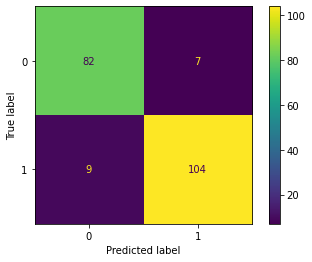

In [41]:
metrics.plot_confusion_matrix(catboost,x_test,y_test)

### Perceptron

In [42]:
perceptron = Perceptron()
perceptron.fit(x_train, y_train)

In [43]:
predict_per = perceptron.predict(x_test)
print(metrics.classification_report(y_test,predict_per))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        89
           1       0.84      0.75      0.79       113

    accuracy                           0.78       202
   macro avg       0.78      0.79      0.78       202
weighted avg       0.79      0.78      0.78       202



### Multi Layer Perceptron

In [44]:
model_mlp = Sequential()
model_mlp.add(Dense(10,activation="relu",input_shape=(10,)))
model_mlp.add(Dense(2048,activation="relu"))
model_mlp.add(Dense(128,activation="relu"))
model_mlp.add(Dense(64,activation="relu"))
model_mlp.add(Dense(32,activation="relu"))
model_mlp.add(Dense(2,activation="softmax"))

In [45]:
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 2048)              22528     
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 295,312
Trainable params: 295,312
Non-trai

In [46]:
model_mlp.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
checkpoint = ModelCheckpoint("model_mlp.h5",monitor="val_accuracy",mode="max",save_best_only=True)

In [47]:
history = model_mlp.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=200,batch_size=25,callbacks=[checkpoint])

Epoch 1/200
33/33 [==============================] - 1s 9ms/step - loss: 0.5569 - accuracy: 0.7178 - val_loss: 0.4706 - val_accuracy: 0.7772
Epoch 2/200
33/33 [==============================] - 0s 5ms/step - loss: 0.4666 - accuracy: 0.7859 - val_loss: 0.4644 - val_accuracy: 0.7871
Epoch 3/200
33/33 [==============================] - 0s 6ms/step - loss: 0.4384 - accuracy: 0.7970 - val_loss: 0.4526 - val_accuracy: 0.7921
Epoch 4/200
33/33 [==============================] - 0s 6ms/step - loss: 0.4277 - accuracy: 0.7983 - val_loss: 0.4201 - val_accuracy: 0.8119
Epoch 5/200
33/33 [==============================] - 0s 4ms/step - loss: 0.4058 - accuracy: 0.8156 - val_loss: 0.4229 - val_accuracy: 0.8119
Epoch 6/200
33/33 [==============================] - 0s 5ms/step - loss: 0.4071 - accuracy: 0.8131 - val_loss: 0.3911 - val_accuracy: 0.8267
Epoch 7/200
33/33 [==============================] - 0s 4ms/step - loss: 0.3911 - accuracy: 0.8243 - val_loss: 0.4103 - val_accuracy: 0.8168
Epoch 8/200
3

In [48]:
with open("StandardScaler","wb") as f:
    pickle.dump(SS,f)

In [49]:
acc = [{"Algorithm":"KNeighbors",'Accuracy': metrics.accuracy_score(y_test,predict_knn),'Precision': metrics.precision_score(y_test,predict_knn),'Recall': metrics.recall_score(y_test,predict_knn),'F1-score': metrics.f1_score(y_test,predict_knn)},
       {"Algorithm":"SVM", 'Accuracy': metrics.accuracy_score(y_test,predict_svm),'Precision': metrics.precision_score(y_test,predict_svm),'Recall': metrics.recall_score(y_test,predict_svm),'F1-score': metrics.f1_score(y_test,predict_svm)},
        {"Algorithm":"RandomForest",'Accuracy': metrics.accuracy_score(y_test,predict_rf),'Precision': metrics.precision_score(y_test,predict_rf),'Recall': metrics.recall_score(y_test,predict_rf),'F1-score': metrics.f1_score(y_test,predict_rf)},
        {"Algorithm":"Adaboost", 'Accuracy': metrics.accuracy_score(y_test,predict_ab),'Precision': metrics.precision_score(y_test,predict_ab),'Recall': metrics.recall_score(y_test,predict_ab),'F1-score': metrics.f1_score(y_test,predict_ab)},
        {"Algorithm":"Gboost",'Accuracy': metrics.accuracy_score(y_test,predict_gb),'Precision': metrics.precision_score(y_test,predict_gb),'Recall': metrics.recall_score(y_test,predict_gb),'F1-score': metrics.f1_score(y_test,predict_gb)},
        {"Algorithm":"XGboost",'Accuracy': metrics.accuracy_score(y_test,predict_xb),'Precision': metrics.precision_score(y_test,predict_xb),'Recall': metrics.recall_score(y_test,predict_xb),'F1-score': metrics.f1_score(y_test,predict_xb)},
        {"Algorithm":"Catboost",'Accuracy': metrics.accuracy_score(y_test,predict_cat),'Precision': metrics.precision_score(y_test,predict_cat),'Recall': metrics.recall_score(y_test,predict_cat),'F1-score': metrics.f1_score(y_test,predict_cat)},
       {"Algorithm":"Perceptron",'Accuracy': metrics.accuracy_score(y_test,predict_per),'Precision': metrics.precision_score(y_test,predict_per),'Recall': metrics.recall_score(y_test,predict_per),'F1-score': metrics.f1_score(y_test,predict_per)},
       {"Algorithm":"MLP",'Accuracy': max(history.history["val_accuracy"]),"Precision": max(history.history["val_accuracy"]), "Recall" :max(history.history["val_accuracy"]) ,"F1-score":max(history.history["val_accuracy"])} 
       ] 


In [50]:
accurac = pd.DataFrame.from_dict(acc)
accurac

,Algorithm,Accuracy,Precision,Recall,F1-score
0,KNeighbors,0.861386,0.876106,0.876106,0.876106
1,SVM,0.821782,0.873786,0.796460,0.833333
2,RandomForest,0.930693,0.954128,0.920354,0.936937
3,Adaboost,0.841584,0.864865,0.849558,0.857143
4,Gboost,0.866337,0.898148,0.858407,0.877828
5,XGboost,0.861386,0.897196,0.849558,0.872727
6,Catboost,0.920792,0.936937,0.920354,0.928571
7,Perceptron,0.782178,0.841584,0.752212,0.794393
8,MLP,0.930693,0.930693,0.930693,0.930693
